In [24]:
import Pkg
Pkg.add("FFTW")
Pkg.add("PyPlot")
Pkg.add("QuadGK")
Pkg.add("MultiQuad")
Pkg.add("Trapz")
Pkg.add("DelimitedFiles")
using FFTW
using PyPlot
using QuadGK
using MultiQuad
using Trapz

In [2]:
using QuadGK
using MultiQuad

k_limit = 200
steps = 16386
d = k_limit/(steps-1)
k = LinRange(0,k_limit,steps)
f_real = zeros(0)
f_imag = zeros(0)
for kk in k
    value, err = quadgk(x->(cos(kk*x)-1)*sqrt(-log(x))/x,0,1.0)
    append!(f_real,value)
    value, err = quad(x->sin(kk*x)*sqrt(-log(x))/x,0,1.0,method=:gausslegendre, order=10000)
    append!(f_imag,value)
end
freq = fftfreq(32768,1/d)*2*π

32768-element Frequencies{Float64}:
  0.0
  0.015708922005941393
  0.03141784401188279
  0.04712676601782418
  0.06283568802376557
  0.07854461002970697
  0.09425353203564836
  0.10996245404158975
  0.12567137604753115
  0.14138029805347255
  0.15708922005941395
  0.17279814206535532
  0.18850706407129672
  ⋮
 -0.18850706407129672
 -0.17279814206535532
 -0.15708922005941395
 -0.14138029805347255
 -0.12567137604753115
 -0.10996245404158975
 -0.09425353203564836
 -0.07854461002970697
 -0.06283568802376557
 -0.04712676601782418
 -0.03141784401188279
 -0.015708922005941393

In [21]:
prefactor = 0.5
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)
ratio = 0.7
fc = (ratio*fc1[1:end-1] .+ (1-ratio)*fc2[2:end])
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
p = fft(fc_t)
normfact = sum(p[1:16385])
p = p/normfact/freq[2]

32768-element Vector{ComplexF64}:
  1.166116433713658 + 4.2529555393473975e-17im
 2.1750196274786826 + 9.054028477801199e-17im
 2.0499430200861855 + 8.095100476057372e-17im
  2.041454550532518 + 1.337931577972029e-16im
 1.8993591310350935 + 1.484733979237858e-16im
  1.855455206748287 + 1.5010485111671096e-16im
  1.740194540974188 + 1.2959982399250058e-16im
   1.69511269096617 + 1.1431093115594956e-17im
 1.6001788784800355 + 4.893120951958831e-17im
  1.558846760384233 + 8.68946162078702e-17im
  1.478736018561279 + 8.305026186172721e-17im
 1.4416804523155806 + 2.613421991389694e-17im
 1.3726929365230904 + 6.933672330482197e-17im
                    ⋮
 0.5989922289676038 - 7.756331572108908e-18im
 0.6036679843271656 + 7.09298860958824e-17im
 0.6467489952730987 + 7.486885866607627e-17im
 0.6509245260378861 + 9.226844412927785e-17im
 0.7023109173994133 - 1.502963622119682e-17im
 0.7047357197576883 + 5.759917309646678e-17im
 0.7682290139974642 + 3.665007930387097e-17im
  0.765291043363213 + 

In [27]:
using DelimitedFiles
int1 = reshape(readdlm("3d_1.csv"),:,1)

1000000×1 Matrix{Float64}:
 0.1545675818271058
 1.250276436181333
 0.3778643692670174
 2.854929533248894
 0.4415933600794282
 1.548591808507857
 0.6618960453476339
 0.6515365802960773
 0.6071222000309054
 0.4880397350804502
 0.48216178866952386
 0.7927568946217097
 0.975707490240992
 ⋮
 0.7063170655356158
 0.8963389760673277
 1.123555207338972
 0.7044364050550876
 1.4747451179437936
 0.9072248723128798
 0.11833620259546315
 0.9790221881441648
 0.654298584196146
 0.47271613134812157
 1.4345400862739104
 2.08887209981656

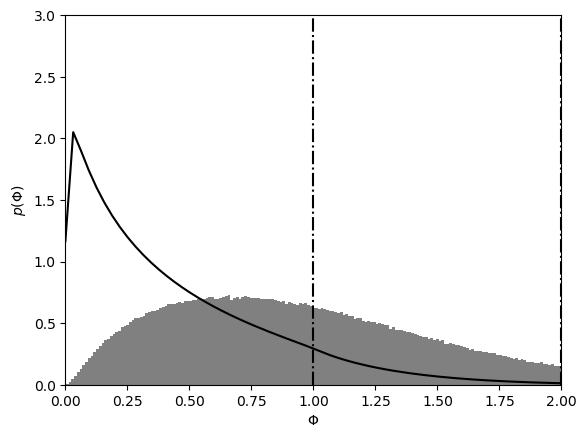

PyObject <matplotlib.lines.Line2D object at 0x7fc262094610>

In [28]:
freq_limit = 1000
using PyPlot
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit]),color="k")
hist(int1,bins=500,density=true,color="gray")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,2))
ylim((0,3))
axvline(x=1,linestyle="-.",color="k")
axvline(x=2,linestyle="-.",color="k")
axvline(x=3,linestyle="-.",color="k")

In [25]:
trapz(freq[1:16385],p[1:16385])

0.9908181537858213 + 9.172893180655402e-16im

In [11]:
prefactor = 1.0
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)
ratio = 0.7
fc = (ratio*fc1[1:end-1] .+ (1-ratio)*fc2[2:end])
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
println(length(fc_t))
p = 2*fft(fc_t)/32768/freq[2]

32768


32768-element Vector{ComplexF64}:
 0.002105681658024981 + 0.0im
   0.0701603387412118 + 8.612605768196013e-18im
  0.17122642753720016 + 1.535677962026909e-17im
    0.264109904030523 + 3.146097514679975e-18im
  0.35114081236468603 - 1.893061318324364e-17im
  0.42863533085991823 + 4.6087976801637243e-17im
  0.49951386482675925 + 2.2002482841508378e-17im
   0.5626700523001593 - 1.0729890229323194e-17im
   0.6202447912706389 + 4.222361941160697e-18im
    0.671674820942929 + 3.0892494564974447e-17im
   0.7185518152460778 + 2.1608049302075434e-17im
   0.7604837125124306 + 3.2286990200329044e-18im
   0.7986985876560208 - 2.08002591374728e-17im
                      ⋮
   0.3397447054600828 + 1.737704607139638e-17im
  0.32360833963900704 + 2.880870989178648e-17im
  0.30550431142320866 + 4.5637697996428136e-17im
   0.2857031496543898 + 5.0544361802773055e-17im
   0.2635032288152516 - 1.5040756265149552e-17im
  0.23917966525950662 + 1.7152633737162336e-17im
  0.21191043732373469 + 2.3440519180014

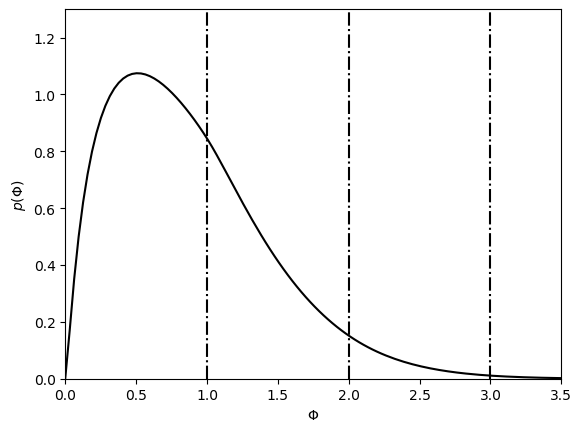

PyObject <matplotlib.lines.Line2D object at 0x7fc290629250>

In [13]:
freq_limit = 1000
using PyPlot
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit]),color="k")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,3.5))
ylim((0,1.3))
axvline(x=1,linestyle="-.",color="k")
axvline(x=2,linestyle="-.",color="k")
axvline(x=3,linestyle="-.",color="k")

In [14]:
prefactor = 2.0
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)
ratio = 0.7
fc = (ratio*fc1[1:end-1] .+ (1-ratio)*fc2[2:end])
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
println(length(fc_t))
p = 2*fft(fc_t)/32768/freq[2]

32768


32768-element Vector{ComplexF64}:
 -0.0023305961843847886 + 0.0im
  -0.002299406805582398 + 3.944866757365994e-18im
 -0.0022082526547024615 + 1.2620719223172274e-18im
 -0.0019541445890810852 - 2.3794938575258524e-18im
 -0.0014358681564985397 - 2.008668870264349e-17im
 -0.0005671095745464284 + 1.17644054570237e-17im
  0.0007202462326022362 + 1.4382415775107068e-17im
  0.0024783588759611373 - 2.6250353838040415e-18im
   0.004744862545825361 + 2.4905772986712923e-18im
   0.007545724227800762 + 2.4042687436480984e-18im
   0.010896732512731764 + 8.837353704641348e-18im
   0.014805711255590465 + 6.58710889862405e-18im
    0.01927358807078265 - 1.5752768384019324e-17im
                        ⋮
   0.006407033322189719 - 8.21512008300303e-18im
   0.004542104770229208 + 1.4271443549971797e-18im
   0.002915522397378342 + 3.3177784064322353e-18im
  0.0015267578320564983 + 1.4070466712769016e-17im
  0.0003725687853416336 + 2.8184370092167373e-18im
 -0.0005539310501132111 + 4.021318512528574e-18im


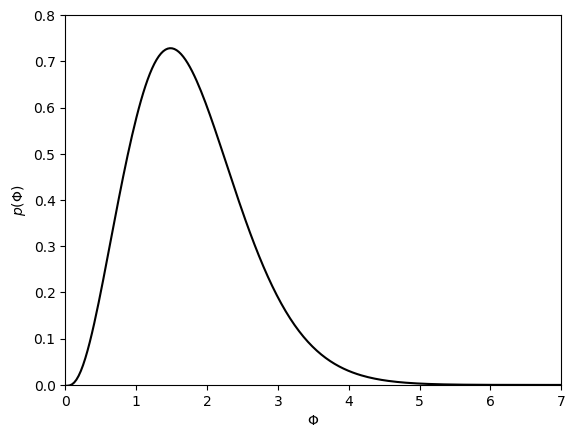

(0, 0.8)

In [17]:
freq_limit = 1000
using PyPlot
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit]),color="k")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,7))
ylim((0,0.8))


In [18]:
prefactor = 0.2
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)
ratio = 0.7
fc = (ratio*fc1[1:end-1] .+ (1-ratio)*fc2[2:end])
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
println(length(fc_t))
p = 2*fft(fc_t)/32768/freq[2]

32768


32768-element Vector{ComplexF64}:
 26.300455039785998 + 0.0im
  13.17418521432941 + 2.621077027609387e-17im
  5.660672248134961 - 1.5107674468868888e-18im
  5.572532498038273 + 2.0739052568370953e-16im
 3.4523000863442372 + 1.5937373556360678e-16im
 3.6405186314912945 + 2.2667611945025055e-16im
 2.4986783751541823 + 1.0511415714538592e-16im
 2.7117153817928035 - 9.31668657905185e-17im
 1.9534882584965425 - 1.3122589803899944e-17im
  2.155755350122228 + 1.7371837461891764e-17im
  1.596508396021767 + 6.529153761863152e-17im
 1.7823158005817044 - 9.725685654036766e-17im
 1.3429891670743006 + 6.087833413301075e-17im
                    ⋮
 0.7747948216888195 - 6.58188038963886e-17im
 0.5461004732295207 + 5.225336878371094e-17im
 0.9224650360189415 + 2.4636631601241277e-17im
 0.6587734611558921 + 7.978708551352108e-17im
 1.1335295647059065 - 5.959154741941961e-17im
 0.8234408335492299 + 1.2549623620250165e-16im
 1.4626988227152036 + 1.9849673292872382e-17im
 1.0915582469169327 - 4.1744023749

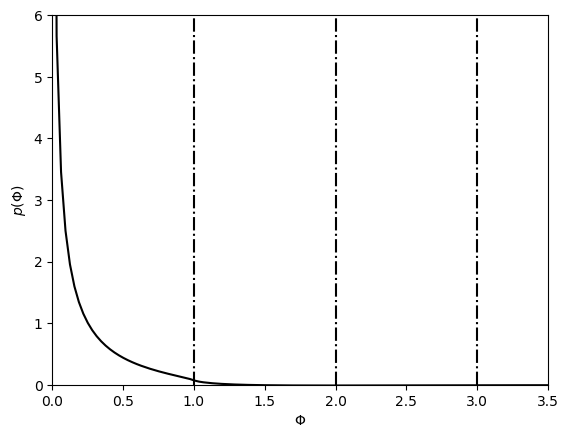

PyObject <matplotlib.lines.Line2D object at 0x7fc281ec4690>

In [20]:
freq_limit = 1000
using PyPlot
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit]),color="k")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,3.5))
ylim((0,6))
axvline(x=1,linestyle="-.",color="k")
axvline(x=2,linestyle="-.",color="k")
axvline(x=3,linestyle="-.",color="k")